In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [22]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away

X=df_diff.iloc[:,1:]
y=df_diff.iloc[:,:1].values.ravel()

In [23]:
data

,MatchID,Score_home,Score_away,Clean sheets_home,Goals Conceded_home,Tackles_home,Tackle success %_home,Last man tackles_home,Blocked shots_home,Interceptions_home,...,Shooting accuracy %_away,Big chances missed_away,Saves_away,Penalties Saved_away,Punches_away,High Claims_away,Catches_away,Sweeper clearances_away,Throw outs_away,Goal Kicks_away
372,7864.0,0.0,0.0,0.123034,0.465864,1.283358,0.341971,0.030113,0.304109,1.083887,...,0.088904,0.027938,0.273469,0.003265,0.080816,0.104082,0.047347,0.064082,0.364490,0.810204
373,7865.0,5.0,0.0,0.120427,0.424498,1.022494,0.776153,0.009966,0.162373,1.077741,...,0.185064,0.056866,0.357724,0.001807,0.046070,0.159892,0.069557,0.064137,0.449864,1.009033
378,7866.0,2.0,1.0,0.085901,0.561814,1.491065,0.478574,0.006096,0.309727,1.275250,...,0.082860,0.040874,0.171333,0.001333,0.035556,0.053556,0.056667,0.014000,0.273556,0.482000
374,7867.0,0.0,5.0,0.074641,0.542763,1.409177,0.852562,0.013472,0.257612,0.960656,...,0.204718,0.086257,0.394608,0.003676,0.057598,0.160539,0.060049,0.033088,0.707108,1.079657
375,7868.0,1.0,1.0,0.071675,0.681396,0.923047,1.405294,0.014915,0.124446,0.843859,...,0.095823,0.038453,0.298828,0.001172,0.035547,0.156250,0.053906,0.070703,0.401953,0.918750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,66716.0,2.0,1.0,0.154776,0.423323,1.453922,0.942267,0.000543,0.321678,0.889995,...,0.244752,0.047306,0.391667,0.000000,0.025000,0.058333,0.016667,0.050000,0.391667,0.725000
3187,66717.0,1.0,0.0,0.118148,0.571071,1.475336,0.337326,0.006799,0.188355,0.822174,...,3.309420,0.070684,0.254359,0.000930,0.029761,0.047198,0.026738,0.024878,0.342944,0.697512
3188,66719.0,3.0,1.0,0.177373,0.429709,1.302328,0.767092,0.004223,0.338215,0.785771,...,0.097222,0.036314,0.309615,0.003846,0.046154,0.113462,0.005769,0.071154,0.542308,0.719231
3189,66720.0,3.0,2.0,0.152611,0.268544,1.202184,0.306927,0.005149,0.359289,0.737440,...,0.184751,0.058933,0.252525,0.000000,0.020202,0.101010,0.000000,0.000000,0.333333,0.767677


In [25]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Feature selection

Feature ranking:
1. feature Clean sheets (0.029)
2. feature Assists (0.024)
3. feature Big Chances Created (0.024)
4. feature Passes (0.022)
5. feature Goals Conceded (0.021)
6. feature Clearances off line (0.021)
7. feature Goals (0.021)
8. feature Crosses (0.021)
9. feature Headed goals (0.021)
10. feature Own goals (0.021)
11. feature Penalties Saved (0.021)
12. feature Goals with right foot (0.020)
13. feature Yellow cards (0.020)
14. feature Penalties scored (0.020)
15. feature Throw outs (0.020)
16. feature Cross accuracy % (0.020)
17. feature Goals with left foot (0.020)
18. feature Blocked shots (0.020)
19. feature Catches (0.020)
20. feature Red cards (0.020)
21. feature Last man tackles (0.020)
22. feature Errors leading to goal (0.020)
23. feature Punches (0.020)
24. feature Passes per match (0.020)
25. feature Recoveries (0.020)
26. feature Through balls (0.020)
27. feature Successful 50/50s (0.020)
28. feature Goal Kicks (0.020)
29. feature Tackles (0.020)
30. feature Hit 

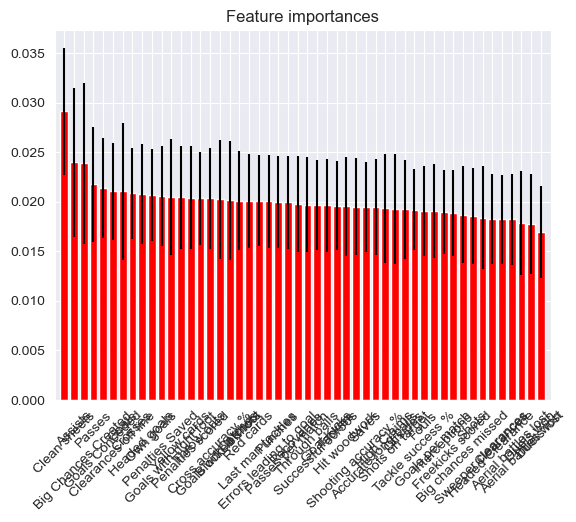

In [26]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 50), (2835,), (354, 50), (354,), (355, 50), (355,))

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])
model=model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)